# Write a function to determine the optimal (highest accuracy on test set) degree and/or cost for rbf or polynomial kernels for the breast cancer dataset. (You choose the inputs you think are appropriate.)

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X, Y = load_breast_cancer(return_X_y=True)

Visualizing the data with a DataFrame:

In [ ]:
from sklearn import datasets
import pandas as pd

cancer = datasets.load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Y_df = pd.DataFrame(cancer.target)
Y_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import svm

def fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs):
  ranks = []
  for d in ds:
    for C in Cs:
      clf = svm.SVC(kernel='poly', degree=d, gamma='auto', C=C)
      model = clf.fit(X_train, y_train.ravel()) 
      y_pred = model.predict(X_test)
      accuracy_d_c = [round(accuracy_score(y_pred, y_test),5), d, round(C, 2)]
      ranks.append(accuracy_d_c)
  return(ranks)


def fineTuningRBF(X_train, X_test, y_train, y_test, Cs):
  ranks = []
  for C in Cs:
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    model = clf.fit(X_train, y_train.ravel()) 
    y_pred = model.predict(X_test)
    accuracy_c = [round(accuracy_score(y_pred, y_test),5), round(C,2)]
    ranks.append(accuracy_c)
  return(ranks)

def optimal_cancer_preds(X, Y, Cs, ds, test_Size): # X and Y must be type array 
  X = pd.DataFrame(X).values
  Y = pd.DataFrame(Y).values
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
  RBF_list = fineTuningRBF(X_train, X_test, y_train, y_test, Cs)  # find the accuracy for each RBF C
  poly_list = fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs) # find the accuracy for each poly d and C
  RBF_accuracy = []
  poly_accuracy = []
  for accuracy_c in RBF_list:
    RBF_accuracy.append(accuracy_c[0])
  for accuracy_d_c in poly_list:
    poly_accuracy.append(accuracy_d_c[0])
  best_accuracy_RBF = max(RBF_accuracy)  # find the highest generated accuracy for the RBF function 
  best_accuracy_poly = max(poly_accuracy)   # find the highest generated accuracy for the poly function
  if best_accuracy_RBF >= best_accuracy_poly:  # if the RBF produces a better-best accuracy than the poly 
    bests = []   # also if there is a tie I chose RBF because its faster 
    for accuracy_c in RBF_list:
      if accuracy_c[0] == best_accuracy_RBF:  # add the Cs that gave the highest accuracy to a return list
        bests.append(accuracy_c[1])  
    print("RBF produced higher accuracy than the polynomial fit")
    print("The best C values to use for highest accuracy are:", bests)  # return them 
  else:  
    bests = []   
    for accuracy_d_c in poly_list:  # for each accuracy produced by a d, c combo
      if accuracy_d_c[0] == best_accuracy_poly:  # if that accuracy is equal to the largest accuracy add it to the best list
        Cs_and_Ds = [accuracy_d_c[2], accuracy_d_c[1]]  # add that d, c combo to a return list 
        bests.append(Cs_and_Ds) 
    print("The polynomial function produced higher accuracy than the RBF")
    print("The best D and C values to use for highest accuracy are:", bests) # return them 

In [ ]:
# what is a good range for the Cs?
ds = list(range(1,3))
Cs = np.arange(0.2, 2, 0.2).tolist()  # good rule of thumb: start below 1 and go to about 2
test_size = 0.3
best_predictions = optimal_cancer_preds(X, Y, Cs, ds, test_size)
best_predictions

The polynomial function produced higher accuracy than the RBF
The best D and C values to use for highest accuracy are: [[0.8, 2], [1.0, 2], [1.2, 2], [1.4, 2], [1.6, 2], [1.8, 2]]


# Plot at least 2 of the the support vectors (2-3 features per plot) for each kernel.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


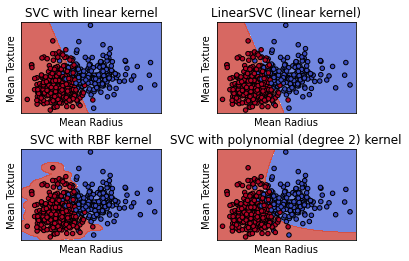

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



cancer = datasets.load_breast_cancer()
# Take the first two features
X = cancer.data[:, :2]  # worst concave points and worst parameter 
y = cancer.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter (usually start with .1 to 2)   # All Cs are the same so I just stuck with 2
models = (svm.SVC(kernel='linear', C=C), #uses regular hinge loss
          svm.LinearSVC(C=C, max_iter=10000), #uses squared hl
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly', degree=2, gamma='auto', C=C))   # Degree 2 was best out of degrees 1-7
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Mean Radius')
    ax.set_ylabel('Mean Texture')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Does changing the size of the test set change the optimal parameters? Why or why not? Does changing the parameters change the runtime? Why or why not?

In [ ]:
# to determine how test size affects optimal parameters 

test_sizes = [0.2, 0.3, 0.4, 0.5]
for test_size in test_sizes:
  ds = list(range(1,3))
  Cs = np.arange(0.2, 2, 0.2).tolist()  # good rule of thumb: start below 1 and go to about 2
  print("Test size:", test_size)
  best_predictions = optimal_cancer_preds(X, Y, Cs, ds, test_size)

Test size: 0.2
The polynomial function produced higher accuracy than the RBF
The best D and C values to use for highest accuracy are: [[0.2, 1], [0.4, 1], [0.2, 2]]
Test size: 0.3
The polynomial function produced higher accuracy than the RBF
The best D and C values to use for highest accuracy are: [[0.2, 1], [0.6, 1], [0.8, 1], [1.0, 1], [1.2, 1]]
Test size: 0.4
The polynomial function produced higher accuracy than the RBF
The best D and C values to use for highest accuracy are: [[0.2, 1], [0.6, 1], [0.8, 1], [1.0, 1]]
Test size: 0.5
The polynomial function produced higher accuracy than the RBF
The best D and C values to use for highest accuracy are: [[1.0, 1], [1.2, 1], [1.4, 1]]


In [ ]:
# to determine how parameters affect runtime

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import svm
import time 

def fineTuning(X_train, X_test, y_train, y_test, ds,Cs):
  for d in ds:
    for C in Cs:
      start_time = time.time()
      clf = svm.SVC(kernel='poly', degree=d, gamma='auto', C=C)
      model = clf.fit(X_train, y_train.ravel()) 
      y_pred = model.predict(X_test)
      end_time = time.time()
      #print('d:',d, 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
      print('d:',d, 'C:',round(C,2),'time:', end_time - start_time)

ds = list(range(1,4))
Cs = np.arange(0.2, 0.6, 0.2).tolist()  # good rule of thumb: start below 1 and go to about 2 
X = pd.DataFrame(X).values
Y = pd.DataFrame(Y).values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
poly_list = fineTuning(X_train, X_test, y_train, y_test, ds,Cs)
poly_list

d: 1 C: 0.2 time: 0.015381336212158203
d: 1 C: 0.4 time: 0.023677587509155273
d: 2 C: 0.2 time: 8.501473188400269
d: 2 C: 0.4 time: 9.760929822921753
d: 3 C: 0.2 time: 76.70442795753479
d: 3 C: 0.4 time: 85.92413473129272
